In [37]:
import os, re
import numpy as np
from PIL import Image, ImageDraw

In [24]:
root_dir = '/opt/data4/jzy/dataset/Face_dataset/CelebA/img_align_celeba/'
anno_dir = '/opt/data4/Face_dataset/CelebA/CelebA/Anno/list_landmarks_align_celeba.txt'

In [29]:
with open(anno_dir, 'r') as f:
    anno_list = f.read().strip('\n').split('\n')[2:]
anno_list[0]

'000001.jpg 69  109  106  113   77  142   73  152  108  154'

In [52]:
i = 1
img_name = re.split('\W+', anno_list[i])[0] + '.' + re.split('\W+', anno_list[i])[1]
landmarks = [int(x) for x in re.split('\W+', anno_list[i])[2:]]
print(img_name, landmarks)

000002.jpg [69, 110, 107, 112, 81, 135, 70, 151, 108, 153]


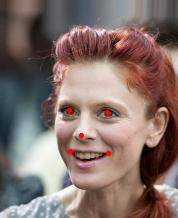

In [53]:
img = Image.open(os.path.join(root_dir, img_name))
draw = ImageDraw.Draw(img)
draw.point(landmarks)
r = 2
for i in range(5):
    x = landmarks[2 * i]
    y = landmarks[2 * i + 1]
    draw.ellipse([x - r, y - r, x + r, y + r], fill='red', outline='red')
img

In [43]:
biased_landmarks, landmarks

(array([ 69, 100, 106, 104,  77, 133,  73, 143, 108, 145]),
 array([ 69, 109, 106, 113,  77, 142,  73, 152, 108, 154]))

In [4]:
file_list = sorted(os.listdir(root_dir))
img_list = []
anno_list = []
for x in file_list:
    if x[-3:] == 'jpg':
        img_list.append(os.path.join(root_dir, x))
    elif x[-3:] == 'txt':
        anno_list.append(os.path.join(root_dir, x))

In [6]:
i = 0

In [15]:
img = Image.open(img_list[i])
with open(anno_list[i], 'r') as f:
    anno = f.read().strip('\n').split('\n')
landmarks = []
for p in anno:
    split = p.split(' ')
    x = int(split[0])
    y = int(split[1])
    landmarks.append((x, y))
print(landmarks[0])

(98, 63)


In [21]:
draw = ImageDraw.Draw(img)

In [22]:
draw.point(landmarks, fill='white')

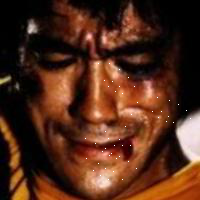

In [23]:
img